In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [8]:
df = pd.read_csv("Resources/Data/ThoracicSurgery.csv")
df

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [9]:
df = df.drop("id", axis=1)

In [10]:
target = df["Risk1Yr"]
target_names = ["T", "F"]
data = df.drop("Risk1Yr", axis=1)
data = pd.get_dummies(data)

In [11]:
feature_names = data.columns
data.head()

,PRE4,PRE5,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8,...,PRE17_F,PRE17_T,PRE19_F,PRE19_T,PRE25_F,PRE25_T,PRE30_F,PRE30_T,PRE32_F,PRE32_T
0,2.88,2.16,60,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1,3.40,1.88,51,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,2.76,2.08,59,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
3,3.68,3.04,54,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,2.44,0.96,73,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8617021276595744

In [8]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.1888126937151916, 'PRE5'),
 (0.165995685259865, 'PRE4'),
 (0.1579862337402971, 'AGE'),
 (0.029868827679052124, 'DGN_DGN5'),
 (0.027885478720274505, 'PRE14_OC11'),
 (0.02606091790573492, 'PRE14_OC14'),
 (0.025773069560364608, 'DGN_DGN3'),
 (0.02472389179157497, 'PRE14_OC12'),
 (0.02230162912289324, 'PRE8_T'),
 (0.020919757269465728, 'PRE6_PRZ1'),
 (0.020547622726259544, 'DGN_DGN2'),
 (0.020235937598254355, 'PRE8_F'),
 (0.02005524026906398, 'PRE14_OC13'),
 (0.019863456851834684, 'PRE11_F'),
 (0.019419911125715977, 'PRE11_T'),
 (0.01729429691440677, 'PRE10_F'),
 (0.017058828430738936, 'PRE17_F'),
 (0.0163102045154732, 'PRE7_T'),
 (0.01628937737438122, 'PRE17_T'),
 (0.01525333289186003, 'PRE9_T'),
 (0.015191700945842847, 'PRE6_PRZ0'),
 (0.014762440285604606, 'PRE9_F'),
 (0.014383056070077987, 'PRE30_F'),
 (0.014146033001778661, 'PRE7_F'),
 (0.013949222884060199, 'PRE10_T'),
 (0.013111696128130805, 'DGN_DGN4'),
 (0.012269891334515755, 'PRE30_T'),
 (0.008451829893479694, 'DGN_DGN8'),
 (0

In [9]:
X = data
y = target
print(X.shape, y.shape)
X.dtypes

(470, 37) (470,)


PRE4          float64
PRE5          float64
AGE             int64
DGN_DGN1        uint8
DGN_DGN2        uint8
DGN_DGN3        uint8
DGN_DGN4        uint8
DGN_DGN5        uint8
DGN_DGN6        uint8
DGN_DGN8        uint8
PRE6_PRZ0       uint8
PRE6_PRZ1       uint8
PRE6_PRZ2       uint8
PRE7_F          uint8
PRE7_T          uint8
PRE8_F          uint8
PRE8_T          uint8
PRE9_F          uint8
PRE9_T          uint8
PRE10_F         uint8
PRE10_T         uint8
PRE11_F         uint8
PRE11_T         uint8
PRE14_OC11      uint8
PRE14_OC12      uint8
PRE14_OC13      uint8
PRE14_OC14      uint8
PRE17_F         uint8
PRE17_T         uint8
PRE19_F         uint8
PRE19_T         uint8
PRE25_F         uint8
PRE25_T         uint8
PRE30_F         uint8
PRE30_T         uint8
PRE32_F         uint8
PRE32_T         uint8
dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [11]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [12]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=37))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [13]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3800      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 14,102
Trainable params: 14,102
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 376 samples
Epoch 1/60
376/376 - 0s - loss: 0.5381 - accuracy: 0.7314
Epoch 2/60
376/376 - 0s - loss: 0.4356 - accuracy: 0.8511
Epoch 3/60
376/376 - 0s - loss: 0.4092 - accuracy: 0.8511
Epoch 4/60
376/376 - 0s - loss: 0.3939 - accuracy: 0.8511
Epoch 5/60
376/376 - 0s - loss: 0.3816 - accuracy: 0.8511
Epoch 6/60
376/376 - 0s - loss: 0.3730 - accuracy: 0.8511
Epoch 7/60
376/376 - 0s - loss: 0.3656 - accuracy: 0.8511
Epoch 8/60
376/376 - 0s - loss: 0.3588 - accuracy: 0.8511
Epoch 9/60
376/376 - 0s - loss: 0.3491 - accuracy: 0.8564
Epoch 10/60
376/376 - 0s - loss: 0.3447 - accuracy: 0.8617
Epoch 11/60
376/376 - 0s - loss: 0.3378 - accuracy: 0.8617
Epoch 12/60
376/376 - 0s - loss: 0.3345 - accuracy: 0.8697
Epoch 13/60
376/376 - 0s - loss: 0.3233 - accuracy: 0.8697
Epoch 14/60
376/376 - 0s - loss: 0.3186 - accuracy: 0.8830
Epoch 15/60
376/376 - 0s - loss: 0.3125 - accuracy: 0.8830
Epoch 16/60
376/376 - 0s - loss: 0.3072 - accuracy: 0.8777
Epoch 17/60
376/376 - 0s - loss: 0.2990 - ac

In [15]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

94/94 - 0s - loss: 0.5662 - accuracy: 0.8404
Normal Neural Network - Loss: 0.5662385732569593, Accuracy: 0.8404255509376526


In [16]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [17]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['F' 'F' 'F' 'F' 'F']
Actual Labels: ['F', 'F', 'F', 'F', 'F']


In [18]:
from sklearn.svm import SVC 

model = SVC(kernel='linear')

In [19]:
SVC(kernel='linear')

SVC(kernel='linear')

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [21]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [22]:
GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=2)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=2)

In [23]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.8510877192982456


In [24]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)
print(predictions)

['F' 'F' 'T' 'F' 'F' 'F' 'T' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'T' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'T' 'T' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'T' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F']


In [25]:
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

Test Acc: 0.830


In [26]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
metrics.f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions))

0.7997973657548125

In [27]:
print(classification_report(y_test, predictions,
                            target_names=["T", "F"]))

              precision    recall  f1-score   support

           T       0.86      0.95      0.90        80
           F       0.33      0.14      0.20        14

    accuracy                           0.83        94
   macro avg       0.60      0.55      0.55        94
weighted avg       0.78      0.83      0.80        94



# Data Pre-Processing
### Data Cleaning

In [12]:
new_df = df[['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr']]
new_df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [29]:
from matplotlib import pyplot as plt

X = new_df['PRE4'].values.reshape(-1, 1)
y = new_df['AGE'].values.reshape(-1, 1)

print('Shape: ', X.shape, y.shape)

Shape:  (470, 1) (470, 1)


Text(0, 0.5, 'Age')

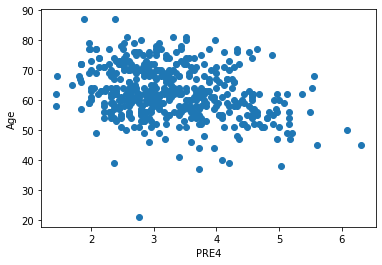

In [30]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("PRE4")
plt.ylabel("Age")
### END SOLUTION

In [31]:
X2 = new_df['AGE'].values.reshape(-1, 1)
y2 = new_df['PRE5'].values.reshape(-1, 1)

print('Shape: ', X2.shape, y2.shape)

Shape:  (470, 1) (470, 1)


Text(0, 0.5, 'PRE5')

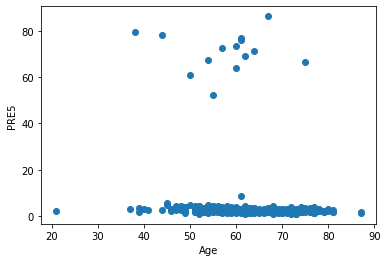

In [32]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X2, y2)
plt.xlabel("Age")
plt.ylabel("PRE5")
### END SOLUTION

In [33]:
pre_true = [31, 68, 31, 323, 78, 35, 2, 8, 386, 368]
x_axis = np.arange(len(pre_true))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'Number of Preconditions found')

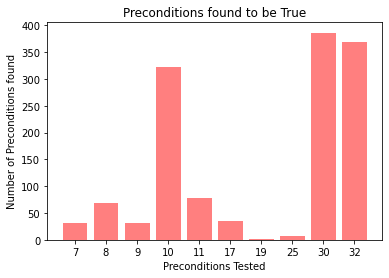

In [34]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["7", "8", "9", "10", "11", "17", "19", "25", "30", "32"])
# plt.xlim(0, max(pre_true)-0.25)
# plt.ylim(0, max(pre_true)+50)
plt.bar(x_axis, pre_true, color='r', alpha=0.5, align="center")
plt.title("Preconditions found to be True")
plt.xlabel("Preconditions Tested")
plt.ylabel("Number of Preconditions found")

In [35]:
columns = [
           "DGN",
           "PRE4",
           "PRE5",
           "PRE6",
           "PRE7",
           "PRE8",
           "PRE9",
           "PRE10",
           "PRE11",
           "PRE14",
           "PRE17",
           "PRE19",
           "PRE25",
           "PRE30",
           "PRE32",
           "AGE",
           "Risk1Yr",
]

lived_df = new_df.loc[new_df["Risk1Yr"] == "F", columns ]
lived_df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
5,DGN3,2.48,1.88,PRZ1,F,F,F,T,F,OC11,F,F,F,F,F,51,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [41]:
pre7_df = lived_df["PRE7"].value_counts()
pre8_df = lived_df["PRE8"].value_counts()
pre9_df = lived_df["PRE9"].value_counts()
pre10_df = lived_df["PRE10"].value_counts()
pre11_df = lived_df["PRE11"].value_counts()
pre14_df = lived_df["PRE14"].value_counts()
pre17_df = lived_df["PRE17"].value_counts()
pre19_df = lived_df["PRE19"].value_counts()
pre25_df = lived_df["PRE25"].value_counts()
pre30_df = lived_df["PRE30"].value_counts()
pre32_df = lived_df["PRE32"].value_counts()

print(pre7_df)
print(f"-------------------------")
print(pre8_df)
print(f"-------------------------")
print(pre9_df)
print(f"-------------------------")
print(pre10_df)
print(f"-------------------------")
print(pre11_df)
print(f"-------------------------")
print(pre14_df)
print(f"-------------------------")
print(pre17_df)
print(f"-------------------------")
print(pre19_df)
print(f"-------------------------")
print(pre25_df)
print(f"-------------------------")
print(pre30_df)
print(f"-------------------------")
print(pre32_df)

F    376
T     24
Name: PRE7, dtype: int64
-------------------------
F    346
T     54
Name: PRE8, dtype: int64
-------------------------
F    378
T     22
Name: PRE9, dtype: int64
-------------------------
T    268
F    132
Name: PRE10, dtype: int64
-------------------------
F    339
T     61
Name: PRE11, dtype: int64
-------------------------
OC12    218
OC11    159
OC13     13
OC14     10
Name: PRE14, dtype: int64
-------------------------
F    375
T     25
Name: PRE17, dtype: int64
-------------------------
F    398
T      2
Name: PRE19, dtype: int64
-------------------------
F    394
T      6
Name: PRE25, dtype: int64
-------------------------
T    323
F     77
Name: PRE30, dtype: int64
-------------------------
F    398
T      2
Name: PRE32, dtype: int64


In [42]:
pre_true_lived = [24, 54, 22, 268, 61, 25, 2, 6, 77, 2]
x2_axis = np.arange(len(pre_true_lived))
x2_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'Number of Preconditions found')

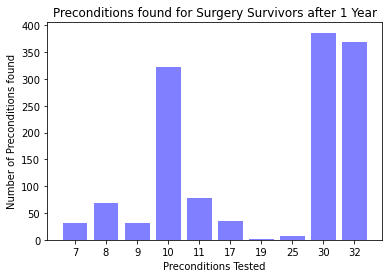

In [43]:
tick_locations2 = [value for value in x2_axis]
plt.xticks(tick_locations2, ["7", "8", "9", "10", "11", "17", "19", "25", "30", "32"])
# plt.xlim(0, max(pre_true)-0.25)
# plt.ylim(0, max(pre_true)+50)
plt.bar(x2_axis, pre_true, color='b', alpha=0.5, align="center")
plt.title("Preconditions found for Surgery Survivors after 1 Year")
plt.xlabel("Preconditions Tested")
plt.ylabel("Number of Preconditions found")

In [44]:
DGN_df = lived_df["DGN"].value_counts()
DGN_df

DGN3    306
DGN4     40
DGN2     40
DGN5      8
DGN6      4
DGN8      1
DGN1      1
Name: DGN, dtype: int64

In [45]:
# Cleaning dataframe - adjusting string values into numeric processible values
new_df['DGN'] = np.where(new_df['DGN'] == 'DGN1', '1', new_df['DGN'] )
new_df['DGN'] = np.where(new_df['DGN'] == 'DGN2', '2', new_df['DGN'] )
new_df['DGN'] = np.where(new_df['DGN'] == 'DGN3', '3', new_df['DGN'] )
new_df['DGN'] = np.where(new_df['DGN'] == 'DGN4', '4', new_df['DGN'] )
new_df['DGN'] = np.where(new_df['DGN'] == 'DGN5', '5', new_df['DGN'] )
new_df['DGN'] = np.where(new_df['DGN'] == 'DGN6', '6', new_df['DGN'] )
new_df['DGN'] = np.where(new_df['DGN'] == 'DGN8', '8', new_df['DGN'] )
new_df['PRE6'] = np.where(new_df['PRE6'] == 'PRZ2', '2', new_df['PRE6'] )
new_df['PRE6'] = np.where(new_df['PRE6'] == 'PRZ1', '1', new_df['PRE6'] )
new_df['PRE6'] = np.where(new_df['PRE6'] == 'PRZ0', '0', new_df['PRE6'] )
new_df['PRE14'] = np.where(new_df['PRE14'] == 'OC11', '11', new_df['PRE14'] )
new_df['PRE14'] = np.where(new_df['PRE14'] == 'OC12', '12', new_df['PRE14'] )
new_df['PRE14'] = np.where(new_df['PRE14'] == 'OC13', '13', new_df['PRE14'] )
new_df['PRE14'] = np.where(new_df['PRE14'] == 'OC14', '14', new_df['PRE14'] )
new_df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,F,F,F,T,T,14,F,F,F,T,F,60,F
1,3,3.40,1.88,0,F,F,F,F,F,12,F,F,F,T,F,51,F
2,3,2.76,2.08,1,F,F,F,T,F,11,F,F,F,T,F,59,F
3,3,3.68,3.04,0,F,F,F,F,F,11,F,F,F,F,F,54,F
4,3,2.44,0.96,2,F,T,F,T,T,11,F,F,F,T,F,73,T


In [13]:
# Data Cleaning - copying dataframe to allow other adjustments for later
cleaned_df = new_df

In [47]:
cleaned_df['PRE7'] = np.where(cleaned_df['PRE7'] == 'T', '0', cleaned_df['PRE7'] )
cleaned_df['PRE7'] = np.where(cleaned_df['PRE7'] == 'F', '1', cleaned_df['PRE7'] )
cleaned_df['PRE8'] = np.where(cleaned_df['PRE8'] == 'T', '0', cleaned_df['PRE8'] )
cleaned_df['PRE8'] = np.where(cleaned_df['PRE8'] == 'F', '1', cleaned_df['PRE8'] )
cleaned_df['PRE9'] = np.where(cleaned_df['PRE9'] == 'T', '0', cleaned_df['PRE9'] )
cleaned_df['PRE9'] = np.where(cleaned_df['PRE9'] == 'F', '1', cleaned_df['PRE9'] )
cleaned_df['PRE10'] = np.where(cleaned_df['PRE10'] == 'T', '0', cleaned_df['PRE10'] )
cleaned_df['PRE10'] = np.where(cleaned_df['PRE10'] == 'F', '1', cleaned_df['PRE10'] )
cleaned_df['PRE11'] = np.where(cleaned_df['PRE11'] == 'T', '0', cleaned_df['PRE11'] )
cleaned_df['PRE11'] = np.where(cleaned_df['PRE11'] == 'F', '1', cleaned_df['PRE11'] )
cleaned_df['PRE17'] = np.where(cleaned_df['PRE17'] == 'T', '0', cleaned_df['PRE17'] )
cleaned_df['PRE17'] = np.where(cleaned_df['PRE17'] == 'F', '1', cleaned_df['PRE17'] )
cleaned_df['PRE19'] = np.where(cleaned_df['PRE19'] == 'T', '0', cleaned_df['PRE19'] )
cleaned_df['PRE19'] = np.where(cleaned_df['PRE19'] == 'F', '1', cleaned_df['PRE19'] )
cleaned_df['PRE25'] = np.where(cleaned_df['PRE25'] == 'T', '0', cleaned_df['PRE25'] )
cleaned_df['PRE25'] = np.where(cleaned_df['PRE25'] == 'F', '1', cleaned_df['PRE25'] )
cleaned_df['PRE30'] = np.where(cleaned_df['PRE30'] == 'T', '0', cleaned_df['PRE30'] )
cleaned_df['PRE30'] = np.where(cleaned_df['PRE30'] == 'F', '1', cleaned_df['PRE30'] )
cleaned_df['PRE32'] = np.where(cleaned_df['PRE32'] == 'T', '0', cleaned_df['PRE32'] )
cleaned_df['PRE32'] = np.where(cleaned_df['PRE32'] == 'F', '1', cleaned_df['PRE32'] )
cleaned_df['Risk1Yr'] = np.where(cleaned_df['Risk1Yr'] == 'T', '0', cleaned_df['Risk1Yr'] )
cleaned_df['Risk1Yr'] = np.where(cleaned_df['Risk1Yr'] == 'F', '1', cleaned_df['Risk1Yr'] )
cleaned_df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,1,1,1,0,0,14,1,1,1,0,1,60,1
1,3,3.40,1.88,0,1,1,1,1,1,12,1,1,1,0,1,51,1
2,3,2.76,2.08,1,1,1,1,0,1,11,1,1,1,0,1,59,1
3,3,3.68,3.04,0,1,1,1,1,1,11,1,1,1,1,1,54,1
4,3,2.44,0.96,2,1,0,1,0,0,11,1,1,1,0,1,73,0


In [48]:
cleaned_df.dtypes

DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

In [49]:
cleaned_df['DGN'] = cleaned_df['DGN'].astype(int)
cleaned_df['PRE6'] = cleaned_df['PRE6'].astype(int)
cleaned_df['PRE7'] = cleaned_df['PRE7'].astype(int)
cleaned_df['PRE8'] = cleaned_df['PRE8'].astype(int)
cleaned_df['PRE9'] = cleaned_df['PRE9'].astype(int)
cleaned_df['PRE10'] = cleaned_df['PRE10'].astype(int)
cleaned_df['PRE11'] = cleaned_df['PRE11'].astype(int)
cleaned_df['PRE14'] = cleaned_df['PRE14'].astype(int)
cleaned_df['PRE17'] = cleaned_df['PRE17'].astype(int)
cleaned_df['PRE19'] = cleaned_df['PRE19'].astype(int)
cleaned_df['PRE25'] = cleaned_df['PRE25'].astype(int)
cleaned_df['PRE30'] = cleaned_df['PRE30'].astype(int)
cleaned_df['PRE32'] = cleaned_df['PRE32'].astype(int)
cleaned_df['Risk1Yr'] = cleaned_df['Risk1Yr'].astype(int)

In [50]:
cleaned_df.dtypes

DGN          int32
PRE4       float64
PRE5       float64
PRE6         int32
PRE7         int32
PRE8         int32
PRE9         int32
PRE10        int32
PRE11        int32
PRE14        int32
PRE17        int32
PRE19        int32
PRE25        int32
PRE30        int32
PRE32        int32
AGE          int64
Risk1Yr      int32
dtype: object

# Modeling on Risk1Yr

In [51]:
X = cleaned_df.drop('Risk1Yr', axis=1)
y = cleaned_df['Risk1Yr']
print(X.shape, y.shape)

(470, 16) (470,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [55]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [56]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=16))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [57]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 12,002
Trainable params: 12,002
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 352 samples
Epoch 1/60
352/352 - 0s - loss: 0.4786 - accuracy: 0.7898
Epoch 2/60
352/352 - 0s - loss: 0.4330 - accuracy: 0.8523
Epoch 3/60
352/352 - 0s - loss: 0.4093 - accuracy: 0.8523
Epoch 4/60
352/352 - 0s - loss: 0.4013 - accuracy: 0.8523
Epoch 5/60
352/352 - 0s - loss: 0.3969 - accuracy: 0.8523
Epoch 6/60
352/352 - 0s - loss: 0.3923 - accuracy: 0.8523
Epoch 7/60
352/352 - 0s - loss: 0.3890 - accuracy: 0.8523
Epoch 8/60
352/352 - 0s - loss: 0.3896 - accuracy: 0.8523
Epoch 9/60
352/352 - 0s - loss: 0.3840 - accuracy: 0.8523
Epoch 10/60
352/352 - 0s - loss: 0.3800 - accuracy: 0.8523
Epoch 11/60
352/352 - 0s - loss: 0.3759 - accuracy: 0.8523
Epoch 12/60
352/352 - 0s - loss: 0.3721 - accuracy: 0.8523
Epoch 13/60
352/352 - 0s - loss: 0.3686 - accuracy: 0.8494
Epoch 14/60
352/352 - 0s - loss: 0.3662 - accuracy: 0.8494
Epoch 15/60
352/352 - 0s - loss: 0.3627 - accuracy: 0.8523
Epoch 16/60
352/352 - 0s - loss: 0.3619 - accuracy: 0.8494
Epoch 17/60
352/352 - 0s - loss: 0.3599 - ac

In [60]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

118/118 - 0s - loss: 0.5082 - accuracy: 0.8051
Normal Neural Network - Loss: 0.5081956629025735, Accuracy: 0.805084764957428


In [61]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [62]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [1 1 1 1 1]
Actual Labels: [1, 1, 1, 1, 1]


# Pete Visualization

In [12]:
pete_df = df.drop(columns = ["DGN", "PRE6", "PRE7", 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19',
             'PRE25', 'PRE30', 'PRE32'])

In [13]:
cleaned_df = pete_df

In [14]:
cleaned_df['PRE14'] = np.where(cleaned_df['PRE14'] == 'OC11', '11', cleaned_df['PRE14'] )
cleaned_df['PRE14'] = np.where(cleaned_df['PRE14'] == 'OC12', '12', cleaned_df['PRE14'] )
cleaned_df['PRE14'] = np.where(cleaned_df['PRE14'] == 'OC13', '13', cleaned_df['PRE14'] )
cleaned_df['PRE14'] = np.where(cleaned_df['PRE14'] == 'OC14', '14', cleaned_df['PRE14'] )
cleaned_df['Risk1Yr'] = np.where(cleaned_df['Risk1Yr'] == 'T', '0', cleaned_df['Risk1Yr'] )
cleaned_df['Risk1Yr'] = np.where(cleaned_df['Risk1Yr'] == 'F', '1', cleaned_df['Risk1Yr'] )
cleaned_df.head()

,PRE4,PRE5,PRE14,AGE,Risk1Yr
0,2.88,2.16,14,60,1
1,3.40,1.88,12,51,1
2,2.76,2.08,11,59,1
3,3.68,3.04,11,54,1
4,2.44,0.96,11,73,0


In [15]:
cleaned_df['PRE14'] = cleaned_df['PRE14'].astype(int)

In [16]:
survived_df = cleaned_df[cleaned_df["Risk1Yr"] == '1']
survived_df.rename(columns={"PRE4": "FVC", "PRE5": "FEV",
                  "PRE14": "TumorSize", "AGE": "Age"}, inplace=True)
survived_df = survived_df.drop("Risk1Yr", axis=1)
survived_df.head()

C:\Users\petej\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FVC,FEV,TumorSize,Age
0,2.88,2.16,14,60
1,3.40,1.88,12,51
2,2.76,2.08,11,59
3,3.68,3.04,11,54
5,2.48,1.88,11,51


In [17]:
survived_df.describe(include='all').loc[['mean']]

,FVC,FEV,TumorSize,Age
mean,3.298525,4.779375,11.685,62.3925


In [18]:
notSurvived_df = cleaned_df[cleaned_df["Risk1Yr"] == '0']
notSurvived_df.rename(columns={"PRE4": "FVC", "PRE5": "FEV",
                  "PRE14": "TumorSize", "AGE": "Age"}, inplace=True)
notSurvived_df = notSurvived_df.drop("Risk1Yr", axis=1)
notSurvived_df.head()

C:\Users\petej\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FVC,FEV,TumorSize,Age
4,2.44,0.96,11,73
6,4.36,3.28,12,59
7,3.19,2.50,11,66
13,3.98,3.06,14,80
24,4.32,3.20,11,58


In [25]:
notSurvived_df.describe(include='all').loc[['mean']]

Non-Surviviors


,FVC,FEV,TumorSize,Age
mean,3.185143,3.364857,12.028571,63.342857
